
# **Análise Exploratória de Dados (EDA) - Análise da Qualidade do Ar**  
**Equipe:**
- Caio Gomes Brayner
- Filipe Leonny da Costa lima
- Guilherme Felipe de Souza Silva
- Jackson Luiz Cordeiro Alves
- Harrisson Lucas Guimarães Ferreira da Silva
- Bruno Weslei Silva Oliveira



#**1. Análise de dados**

o Dataset `updated_pollution_dataset` contém informações sobre a qualide do ar.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('/content/updated_pollution_dataset.csv')


In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [ ]:
df.shape

(5000, 10)

In [ ]:
df.describe()


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


## **2. Tratamento de Dados Ausentes**  

Não foram encontrados dados ausentes ou dados  duplicados

In [ ]:
df.isnull().sum()



,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [ ]:
df.duplicated().sum()


np.int64(0)

#**3.  Estatísticas Descritivas Básicas**
Média, mediana, desvio padrão, mínimo, máximo e quartis das variáveis numéricas

In [ ]:
df_numerico = df.select_dtypes(include=['float64', 'int64'])

medias = df_numerico.mean()
medianas = df_numerico.median()
modas = df_numerico.mode()
desvios_padrao = df_numerico.std()
quartis = df_numerico.quantile([0.25, 0.5, 0.75])
minimos = df_numerico.min()
maximos = df_numerico.max()


print("Médias:\n", medias)
print("\nMedianas:\n", medianas)
print("\nModas:\n", modas)
print("\nDesvios Padrão:\n", desvios_padrao)
print("\nQuartis:\n", quartis)
print("Mínimos de cada coluna numérica:\n", minimos)
print("\nMáximos de cada coluna numérica:\n", maximos)


Médias:
 Temperature                       30.029020
Humidity                          70.056120
PM2.5                             20.142140
PM10                              30.218360
NO2                               26.412100
SO2                               10.014820
CO                                 1.500354
Proximity_to_Industrial_Areas      8.425400
Population_Density               497.423800
dtype: float64

Medianas:
 Temperature                       29.00
Humidity                          69.80
PM2.5                             12.00
PM10                              21.70
NO2                               25.30
SO2                                8.00
CO                                 1.41
Proximity_to_Industrial_Areas      7.90
Population_Density               494.00
dtype: float64

Modas:
    Temperature  Humidity  PM2.5  PM10   NO2  SO2    CO  \
0         26.8      73.0    1.5   8.1  24.2  5.7  0.98   
1          NaN       NaN    NaN   NaN   NaN  NaN  0.99   

   Proxim

#**3.2 variável categórica**

Calcular a frequência de cada categoria e calcular a moda

In [ ]:
frequencia = df['Air Quality'].value_counts()
print("Frequência:\n", frequencia)

moda = frequencia.idxmax()
print("\nModa:", moda)

Frequência:
 Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

Moda: Good


# **4. Visualização de Dados**
# Histogramas para variáveis numéricas

<Figure size 1600x1000 with 0 Axes>

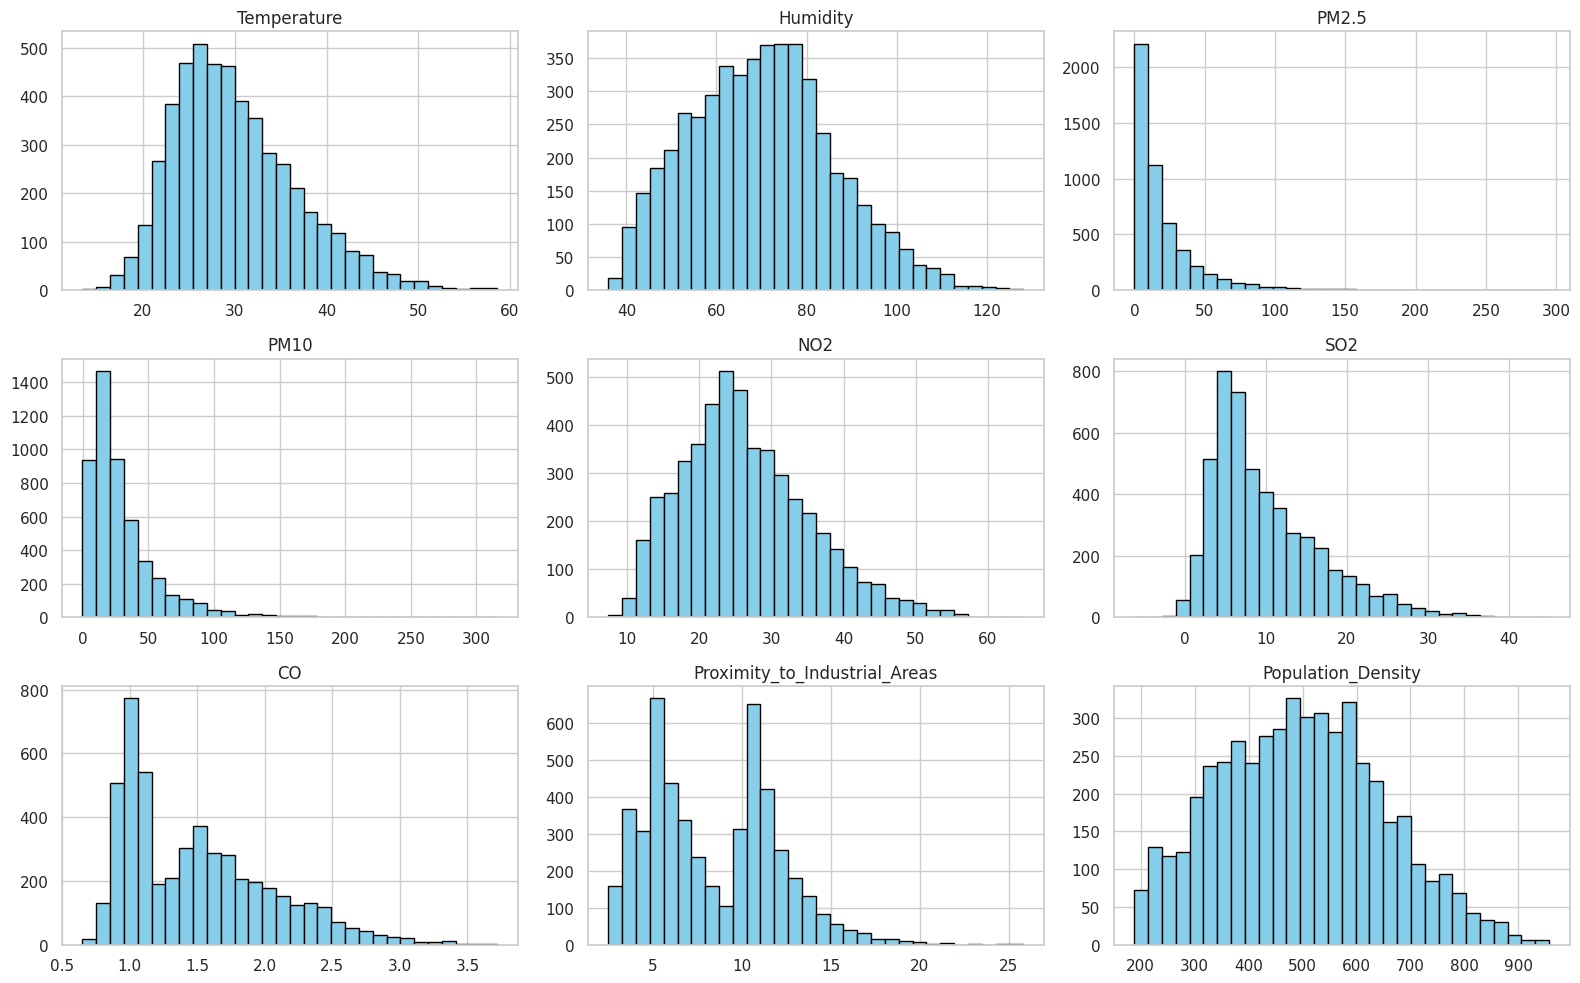

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

df.hist(bins=30, figsize=(16, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

#**4.2 visualização de dados**

Gráfico scatter plots para fazer a comparação entre as variáveis

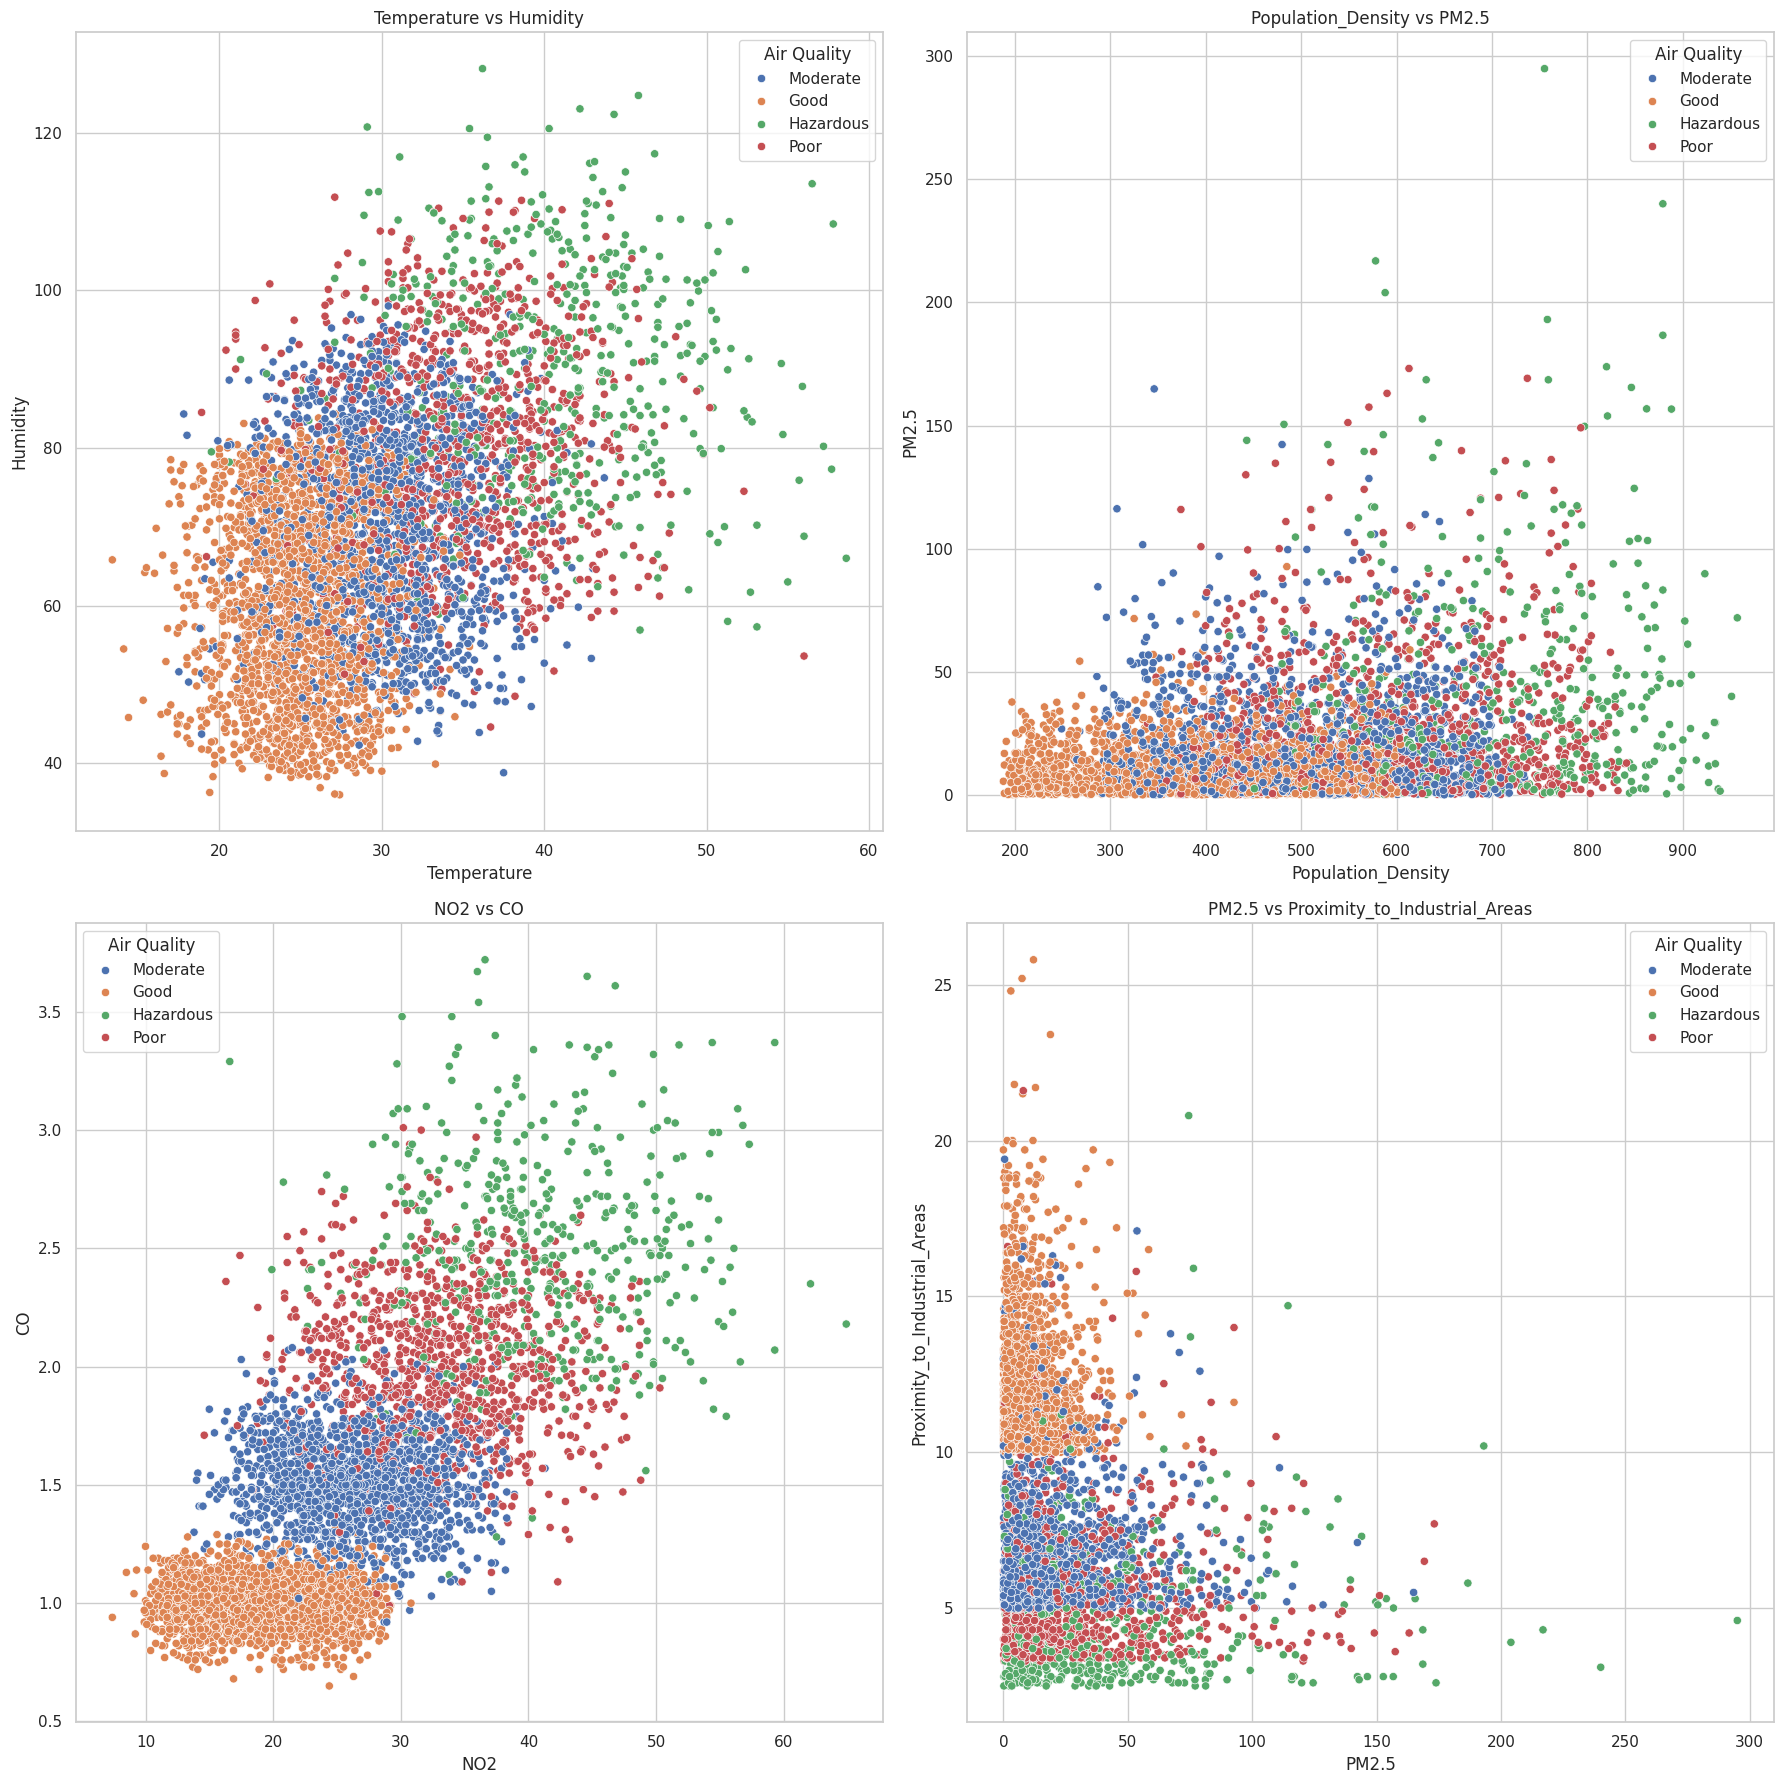

In [ ]:
plt.figure(figsize=(18, 18))

# Temperature vs Humidity
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Temperature', y='Humidity', hue='Air Quality')
plt.title('Temperature vs Humidity')

# Population_Density vs PM2.5
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Population_Density', y='PM2.5', hue='Air Quality')
plt.title('Population_Density vs PM2.5')

# NO2 vs CO
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='NO2', y='CO', hue='Air Quality')
plt.title('NO2 vs CO')

# PM2.5 vs Proximity_to_Industrial_Areas
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='PM2.5', y='Proximity_to_Industrial_Areas', hue='Air Quality')
plt.title('PM2.5 vs Proximity_to_Industrial_Areas')

plt.tight_layout()
plt.show()


#**4.3 visualização de dados**

Gráfico boxplots para variáveis numéricas por categoria de Air Quality

<Figure size 1800x2400 with 0 Axes>

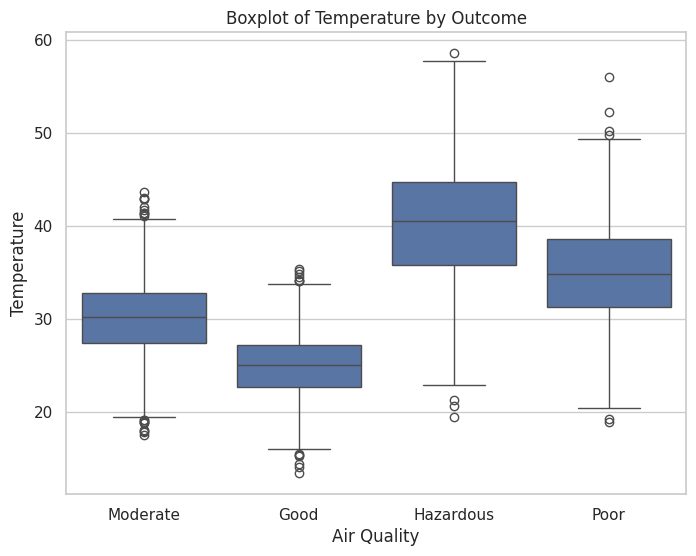

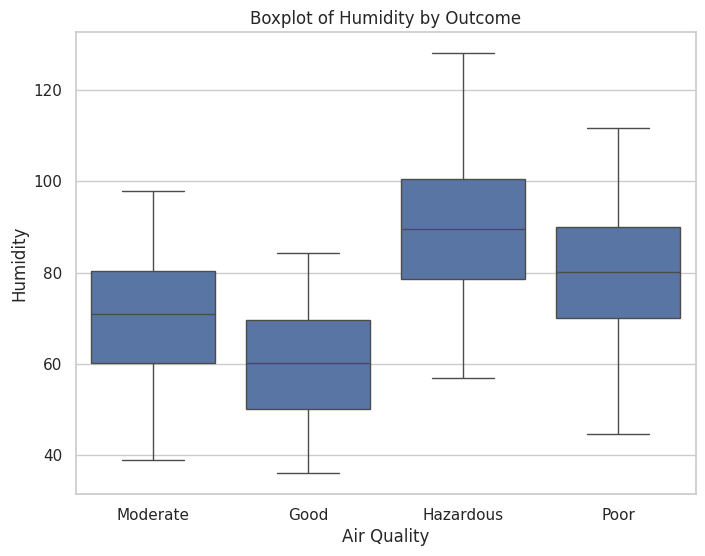

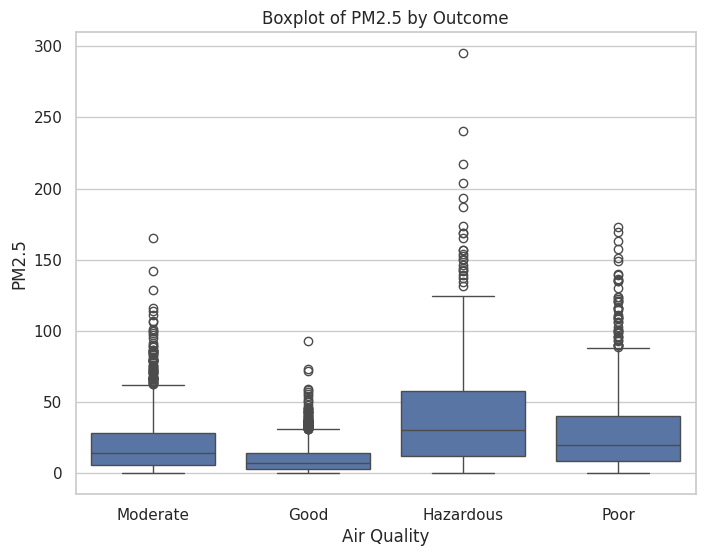

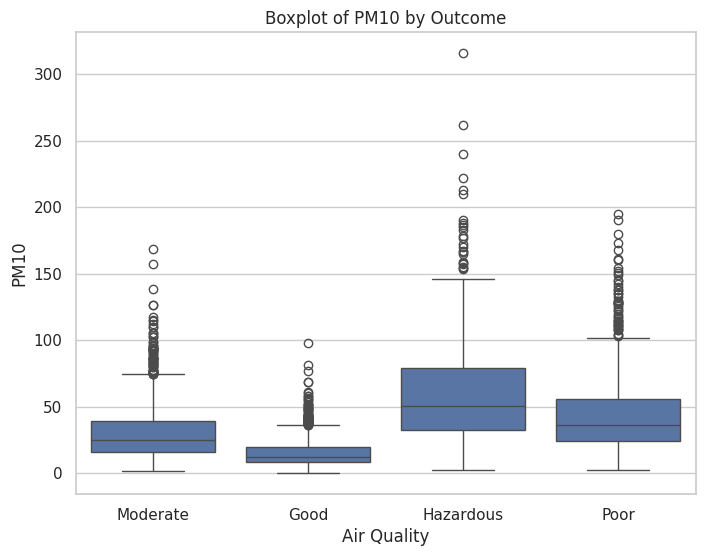

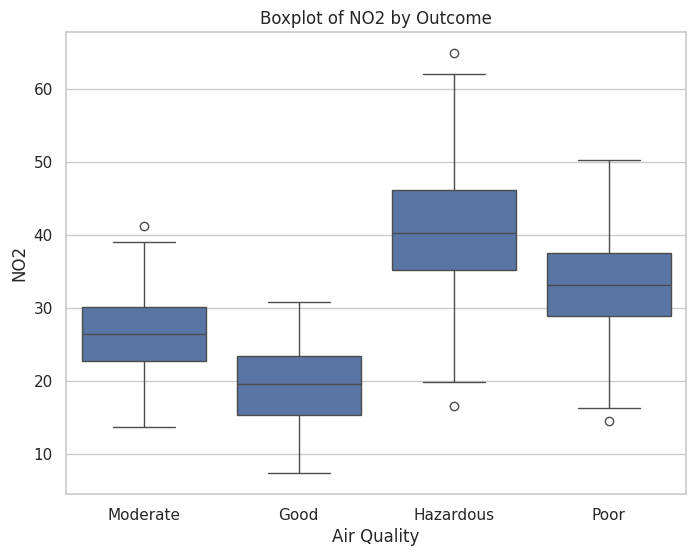

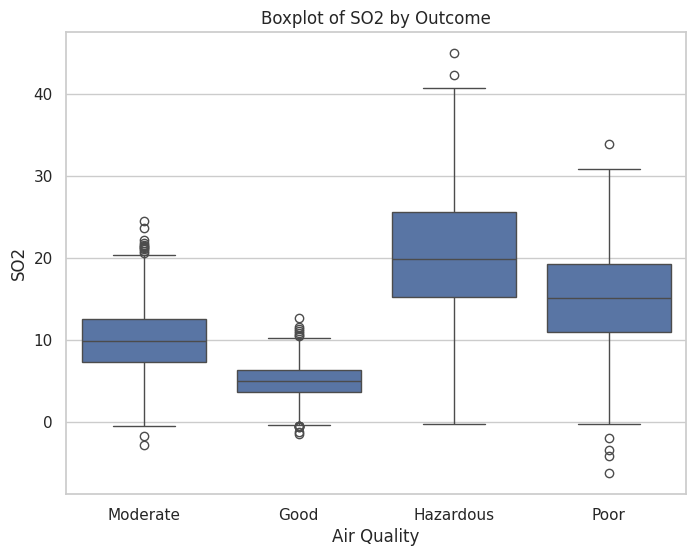

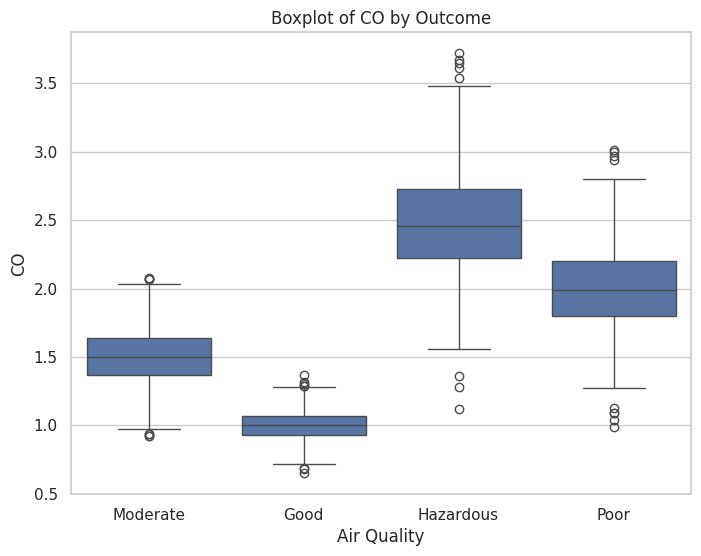

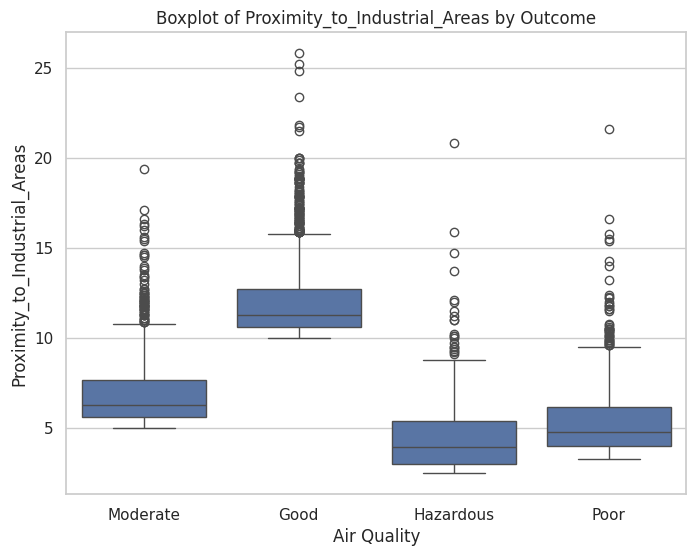

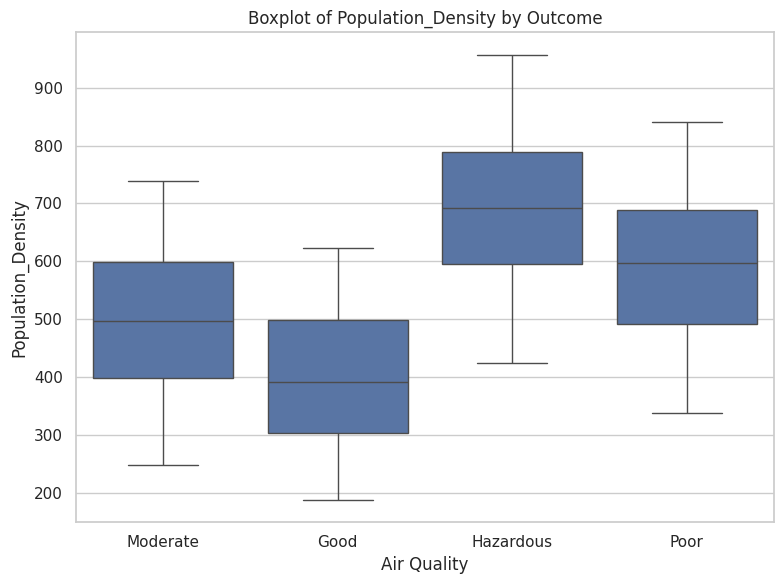

In [ ]:
plt.figure(figsize=(18, 24))

for i, col in enumerate(df_numerico, 1):

        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Air Quality', y=col, data=df)
        plt.title(f'Boxplot of {col} by Outcome')

plt.tight_layout()
plt.show()

#**4.4 visualização de dados**

Gráfico de barras para mostrar a frequêcia das categorias de qualidade do ar


<ipython-input-12-4051a4b80677>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Air Quality", palette="Set2")


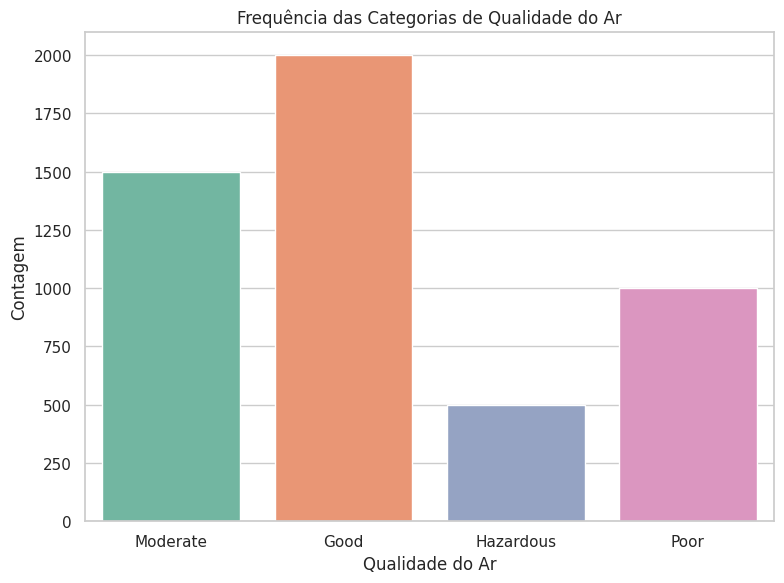

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Air Quality", palette="Set2")
plt.title("Frequência das Categorias de Qualidade do Ar")
plt.xlabel("Qualidade do Ar")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()

#**5. Análise de Distribuição de Variáveis**

Investigação das distribuições de variáveis numéricas e categóricas para identificar assimetrias, outliers e padrões.

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
skewness = df[numeric_cols].skew().sort_values(ascending=False)

outlier_counts = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    outlier_counts[col] = outliers


#**6. Análise de Correlação**

Avaliação das relações entre variáveis, incluindo correlações entre variáveis numéricas e tabelas de contingência para variáveis categóricas.

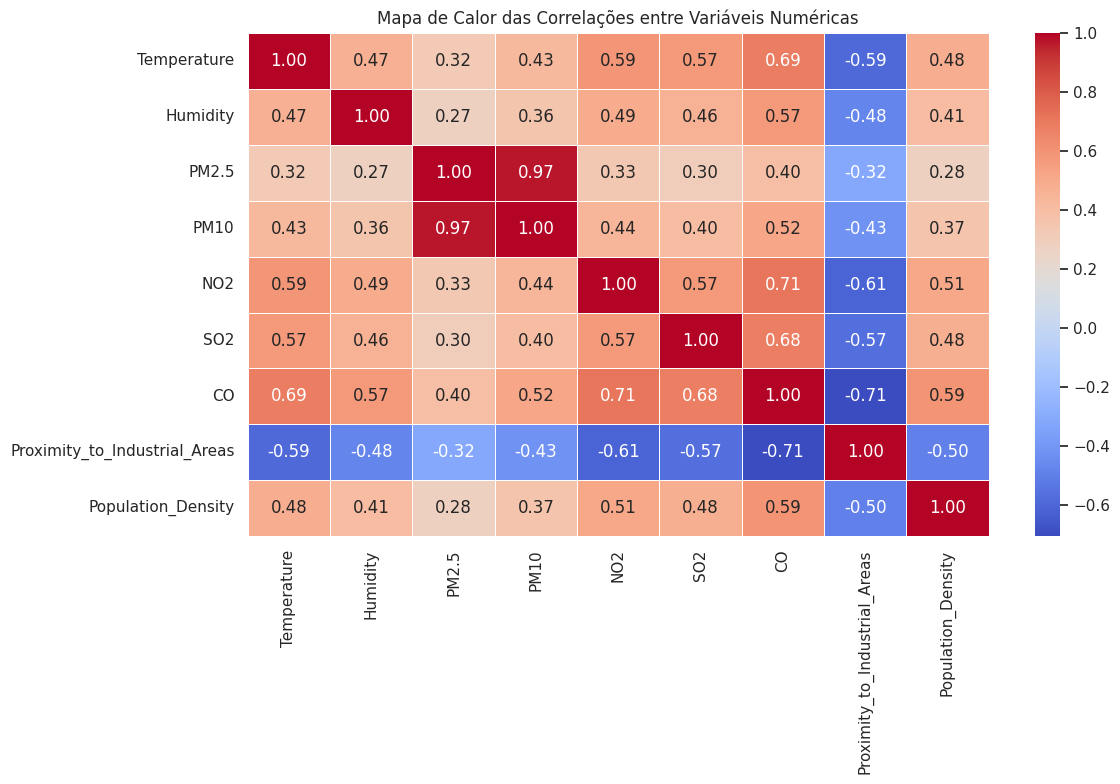

In [ ]:
correlation_matrix = df[numeric_cols].corr()

# Visualização com mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor das Correlações entre Variáveis Numéricas")
plt.tight_layout()
plt.show()


#Correlações fortes:

PM2.5 e PM10: 0.97 Altamente correlacionadas, o que é esperado pois ambas medem partículas em suspensão.

CO e NO2: 0.71

CO e SO2: 0.68

CO e Temperature: 0.69

#Correlações negativas relevantes:


Proximity_to_Industrial_Areas com:

CO: -0.71

NO2: -0.61

Temperature: -0.59

Isso sugere que quanto mais próxima uma área está de zonas industriais, maiores os níveis de poluentes como CO, NO2 e SO2.



#**6.2 Análise de correlação**

Discretização das variáveis numéricas

In [ ]:
df['Temperature_bin'] = pd.cut(df['Temperature'], bins=5)
df['Humidity_bin'] = pd.cut(df['Humidity'], bins=5)
df['Population_bin'] = pd.cut(df['Population_Density'], bins=5)

contingency_temp = pd.crosstab(df['Temperature_bin'], df['Air Quality'])
contingency_humidity = pd.crosstab(df['Humidity_bin'], df['Air Quality'])
contingency_population = pd.crosstab(df['Population_bin'], df['Air Quality'])

contingency_temp, contingency_humidity, contingency_population


(Air Quality      Good  Hazardous  Moderate  Poor
 Temperature_bin                                 
 (13.355, 22.44]   451          3        46    11
 (22.44, 31.48]   1507         36       889   246
 (31.48, 40.52]     42        211       553   601
 (40.52, 49.56]      0        209        12   138
 (49.56, 58.6]       0         41         0     4,
 Air Quality      Good  Hazardous  Moderate  Poor
 Humidity_bin                                    
 (35.908, 54.42]   715          0       197    12
 (54.42, 72.84]    928         64       633   311
 (72.84, 91.26]    357        205       632   451
 (91.26, 109.68]     0        196        38   216
 (109.68, 128.1]     0         35         0    10,
 Air Quality       Good  Hazardous  Moderate  Poor
 Population_bin                                   
 (187.231, 341.8]   719          0       154     1
 (341.8, 495.6]     768         22       593   258
 (495.6, 649.4]     513        174       596   383
 (649.4, 803.2]       0        198       15

Foi feita a discretização das variáveis numéricas para análise categórica e tabelas de contingência entre 'Air Quality' e variáveis discretizadas


#**7.  principais insights, descobertas e padrões**

#Temperatura:

*  Qualidade do ar "Good" é predominante em temperaturas mais baixas.

* À medida que a temperatura aumenta, aumentam os casos de "Poor" e "Hazardous".

#Umidade:

* Umidade moderada favorece melhores condições de ar.

* Umidade muito alta está associada a maior incidência de qualidade do ar ruim ou perigosa.

#Densidade Populacional:

* Regiões com baixa densidade populacional têm majoritariamente ar de boa qualidade.

* Conforme a densidade aumenta, cresce a incidência de poluição do ar severa.

#**8. Potenciais Problemas e Limitações nos Dados**


#Distribuição Desequilibrada da Variável Categórica

* A variável Air Quality pode estar desequilibrada (ex. muitas amostras “Moderate” ou “Good” em comparação com “Hazardous”).

* Isso pode afetar algoritmos de classificação ou análises baseadas em frequência

#Multicolinearidade entre Variáveis Numéricas

* PM2.5 e PM10 têm correlação muito alta (0.97).

* Isso pode causar redundância em modelos estatísticos ou de machine learning, dificultando a interpretação.

#Falta de Informações Temporais
* O dataset parece ser estático. Não há coluna de data/hora para analisar tendências sazonais ou efeitos ao longo do tempo.

#Origem e Escopo Geográfico dos Dados
* Falta de informações sobre localização geográfica (cidade, país) limita a generalização dos achados.

# Treinamento de Modelos



In [ ]:
print(df.columns.tolist())


['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality', 'Temperature_bin', 'Humidity_bin', 'Population_bin']


In [ ]:
x = df.drop(columns=["Air Quality", "Temperature_bin", "Humidity_bin", "Population_bin"])
y = df["Air Quality"]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
modelo_mlp = MLPClassifier(max_iter=500, random_state=42)
modelo_mlp.fit(x_train, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [ ]:
y_pred = modelo_mlp.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.97      0.99      0.98       409
   Hazardous       0.67      0.63      0.65       111
    Moderate       0.80      0.92      0.86       294
        Poor       0.68      0.52      0.59       186

    accuracy                           0.84      1000
   macro avg       0.78      0.76      0.77      1000
weighted avg       0.83      0.84      0.83      1000



In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = modelo_rf.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.92      0.88      0.90       111
    Moderate       0.97      0.97      0.97       294
        Poor       0.88      0.90      0.89       186

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



In [ ]:
import joblib
joblib.dump(modelo_rf, "Air_Quality.pkl")

['Air_Quality.pkl']

In [ ]:
modelo_logistico = LogisticRegression(max_iter=1000)
modelo_logistico.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
y_pred_lg = modelo_logistico.predict(x_test)

In [ ]:
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lg))


Relatório de Classificação:
              precision    recall  f1-score   support

        Good       0.97      0.98      0.97       409
   Hazardous       0.70      0.58      0.63       111
    Moderate       0.85      0.88      0.87       294
        Poor       0.65      0.67      0.66       186

    accuracy                           0.85      1000
   macro avg       0.79      0.78      0.78      1000
weighted avg       0.85      0.85      0.85      1000



In [ ]:
modelo_arvore = DecisionTreeClassifier(random_state=42)
modelo_arvore.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = modelo_arvore.predict(x_test)

In [ ]:
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_dt))


Relatório de Classificação:
              precision    recall  f1-score   support

        Good       0.99      1.00      1.00       409
   Hazardous       0.76      0.86      0.81       111
    Moderate       0.96      0.91      0.94       294
        Poor       0.81      0.80      0.80       186

    accuracy                           0.92      1000
   macro avg       0.88      0.89      0.89      1000
weighted avg       0.92      0.92      0.92      1000

